<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/03_multi_class_image_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi- class Image classification

We've just been through a bunch of following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
5. Repeat until satisfied



## 1. Import and become one with the data

In [26]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-07-23 14:53:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 142.251.175.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  23.7MB/s    in 22s     

2023-07-23 14:54:03 (22.2 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [27]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/test'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
there are 

In [28]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [29]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory where you will get your image from
  target_folder = target_dir+target_class

  # get the random imaage path
  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}")

  return img



image shape: (512, 512, 3)


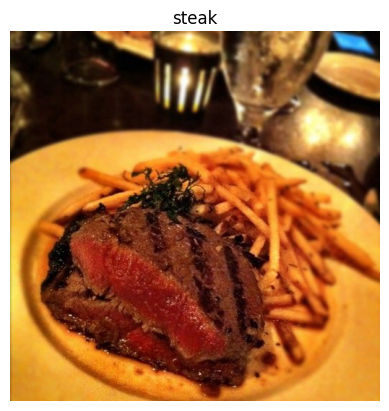

In [31]:
# Visualize

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen =  ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into baatches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)
We've been talking a lot about the CNN explainer website... how about we jusst take their model (also on 10 classes) and use it for our problem...

In [33]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
# set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = Sequential([
    Conv2D(10,kernel_size=3,input_shape=((224,224,3)),activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

# 2. Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
# 3. fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 220ms/step - loss: 2.1961 - accuracy: 0.1840 - val_loss: 2.0123 - val_accuracy: 0.2884
Epoch 2/5
235/235 [==============================] - 52s 219ms/step - loss: 1.9118 - accuracy: 0.3361 - val_loss: 1.8368 - val_accuracy: 0.3504
Epoch 3/5
235/235 [==============================] - 61s 262ms/step - loss: 1.6540 - accuracy: 0.4476 - val_loss: 1.8832 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 1.2613 - accuracy: 0.5841 - val_loss: 2.0391 - val_accuracy: 0.3428
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 0.7877 - accuracy: 0.7520 - val_loss: 2.5434 - val_accuracy: 0.3088


### 5. Evaluate the model

In [35]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 2.5434 - accuracy: 0.3088


[2.5434482097625732, 0.30880001187324524]

In [38]:
# Plot the validation and training curves separetely
def plot_loss_curves(history):
  """
  return separate loss curves for training and validation loss
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


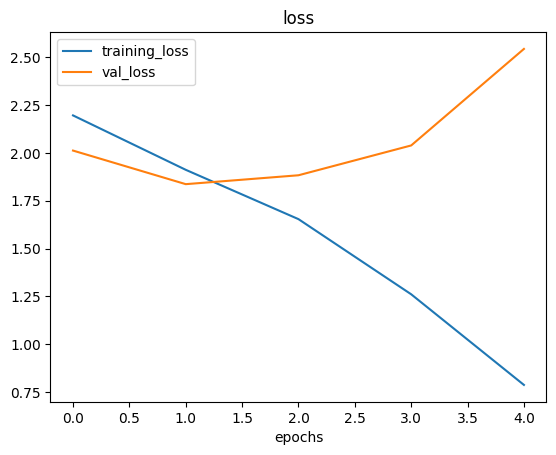

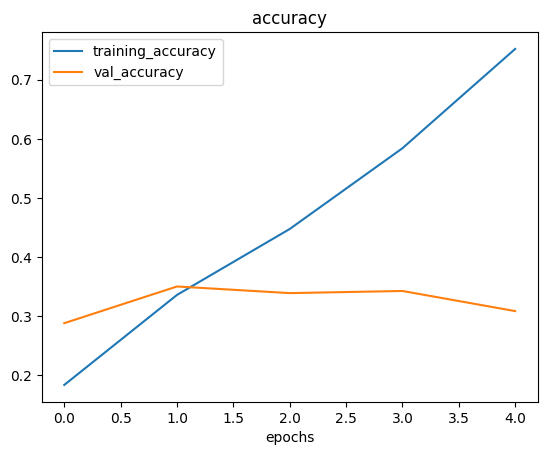

In [39]:
# Check out the model loss curves
plot_loss_curves(history_1)

what do these loss curves tell us?

Well.. it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data set

#### 6. Adjsut the model hyperparameter (to beat the baseline/ reduce overfitting)

In [40]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [49]:
# how about we simplify our model
# lets remove two conv layer

model_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=((224,224,3))),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="relu")
])

#compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 210ms/step - loss: 8.8699 - accuracy: 0.1320 - val_loss: 8.8922 - val_accuracy: 0.1820
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 8.8358 - accuracy: 0.1583 - val_loss: 8.8326 - val_accuracy: 0.1784
Epoch 3/5
235/235 [==============================] - 59s 252ms/step - loss: 8.8208 - accuracy: 0.1909 - val_loss: 8.7879 - val_accuracy: 0.2132
Epoch 4/5
235/235 [==============================] - 49s 207ms/step - loss: 8.8328 - accuracy: 0.1703 - val_loss: 8.8256 - val_accuracy: 0.1388
Epoch 5/5
235/235 [==============================] - 49s 208ms/step - loss: 8.7917 - accuracy: 0.1900 - val_loss: 8.7612 - val_accuracy: 0.2112


In [51]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 29160)             0         
                                                                 
 dense_4 (Dense)             (None, 10)               

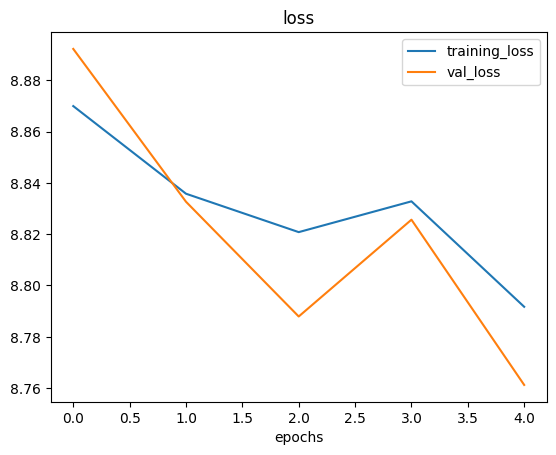

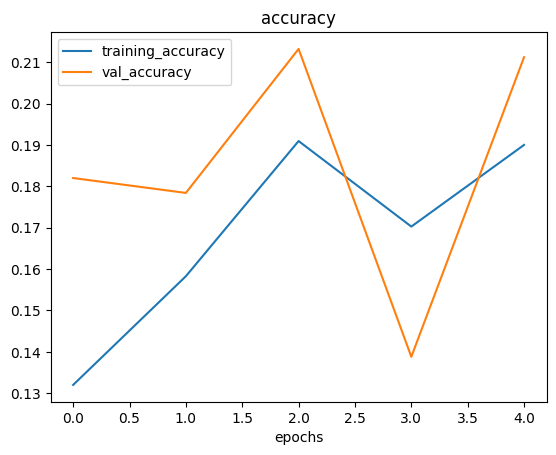

In [52]:
# check out the loss curves
plot_loss_curves(history_2)

Looks like our "simplifying the model" experiment didn't work the accuracy went down and overfitting continued..

How about we try data augmentation?



### Trying to reduce overfitting with data augmentation

In [53]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [54]:
# Let's create another model but this time we'll use augmented data
model_3 = tf.keras.models.clone_model(model_1)

# compile the cloned model
model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [56]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 518ms/step - loss: 2.2769 - accuracy: 0.1329 - val_loss: 2.2052 - val_accuracy: 0.1788
Epoch 2/5
235/235 [==============================] - 121s 514ms/step - loss: 2.1863 - accuracy: 0.1976 - val_loss: 2.1078 - val_accuracy: 0.2564
Epoch 3/5
235/235 [==============================] - 122s 520ms/step - loss: 2.0965 - accuracy: 0.2555 - val_loss: 1.9570 - val_accuracy: 0.3284
Epoch 4/5
235/235 [==============================] - 120s 512ms/step - loss: 2.0423 - accuracy: 0.2840 - val_loss: 1.9020 - val_accuracy: 0.3584
Epoch 5/5
235/235 [==============================] - 122s 521ms/step - loss: 2.0072 - accuracy: 0.2992 - val_loss: 1.9139 - val_accuracy: 0.3552


In [57]:
model_3.evaluate(test_data)

79/79 [==============================] - 17s 220ms/step - loss: 1.9139 - accuracy: 0.3552


[1.913893222808838, 0.35519999265670776]

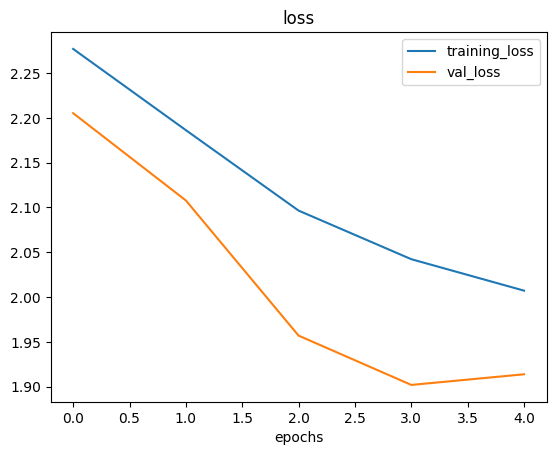

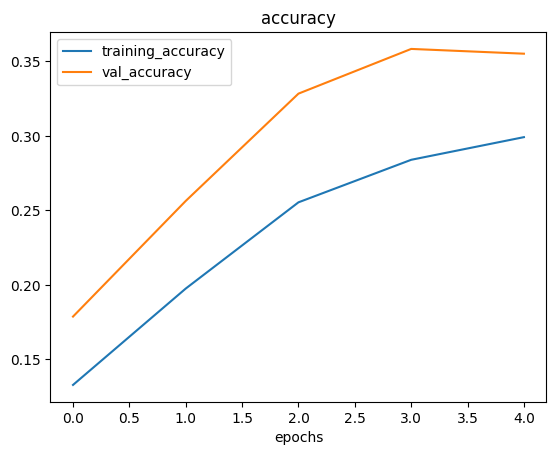

In [58]:
# check out the model trained on augmented data
plot_loss_curves(history_3)

that's look much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvments

### Saving and loading our model

In [61]:
# Save a model
model_3.save("saved_trained_model_3")

In [62]:
# Load in a trained model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model_3")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 16s 205ms/step - loss: 1.9139 - accuracy: 0.3552


[1.9138929843902588, 0.35519999265670776]

In [63]:
# Compare our model to our existing model
model_3.evaluate(test_data)

79/79 [==============================] - 14s 171ms/step - loss: 1.9139 - accuracy: 0.3552


[1.9138933420181274, 0.35519999265670776]